# 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 파일 읽기

In [2]:
jeju_reg_2017_origin = pd.read_csv('data/jeju_card_region_2017.csv', encoding='utf-8')
jeju_reg_2018_origin = pd.read_csv('data/jeju_card_region_2018.csv', encoding='utf-8')
jeju_population_origin = pd.read_csv('data/jeju_population.csv', encoding='utf-8')

In [3]:
jeju_2017 = jeju_reg_2017_origin
jeju_2018 = jeju_reg_2018_origin
jeju_pop = jeju_population_origin

# 간단한 탐색

In [4]:
jeju_2017.head(3)

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300


In [5]:
jeju_2018.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2018-01-01,제주시,아라동,차량용 주유소 운영업,남성,3954,205339045
1,2018-01-01,제주시,삼도1동,차량용 주유소 운영업,남성,490,29469792
2,2018-01-01,제주시,삼도2동,육류 소매업,여성,89,2386740
3,2018-01-01,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,106,12517300
4,2018-01-01,제주시,삼도1동,수산물 소매업,남성,37,2621000


In [6]:
jeju_pop.head(3)

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459


In [7]:
print(jeju_2017.shape)
print(jeju_2018.shape)
print(jeju_pop.shape)

(26968, 7)
(27183, 7)
(527026, 6)


In [8]:
jeju_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26968 entries, 0 to 26967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      26968 non-null  object
 1   시군구명    26968 non-null  object
 2   읍면동명    26968 non-null  object
 3   업종명     26968 non-null  object
 4   성별      26968 non-null  object
 5   이용자수    26968 non-null  int64 
 6   이용금액    26968 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [9]:
jeju_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27183 entries, 0 to 27182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      27183 non-null  object
 1   시군구명    27183 non-null  object
 2   읍면동명    27183 non-null  object
 3   업종명     27183 non-null  object
 4   성별      27183 non-null  object
 5   이용자수    27183 non-null  int64 
 6   이용금액    27183 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [10]:
jeju_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527026 entries, 0 to 527025
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연월일     527026 non-null  int64 
 1   시군구명    527026 non-null  object
 2   읍면동명    527026 non-null  object
 3   성별      527026 non-null  object
 4   연령대     527026 non-null  object
 5   방문인구    527026 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 24.1+ MB


In [11]:
# 과학적 표기법 제거
pd.options.display.float_format = '{:.3f}'.format

In [12]:
jeju_2017.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,26968,26968,26968,26968,26968,26968.000,26968.000
unique,12,2,43,41,2,NaN,NaN
top,2017-11-01,제주시,노형동,슈퍼마켓,남성,NaN,NaN
freq,2265,16076,795,1032,13518,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1703.495,63231393.341
std,NaN,NaN,NaN,NaN,NaN,4313.161,198798394.063
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,43.000,2635000.000
50%,NaN,NaN,NaN,NaN,NaN,281.000,12125170.000
75%,NaN,NaN,NaN,NaN,NaN,1333.250,49059281.000


In [13]:
jeju_2018.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,27183,27183,27183,27183,27183,27183.000,27183.000
unique,12,2,43,41,2,NaN,NaN
top,2018-09-01,제주시,노형동,체인화 편의점,남성,NaN,NaN
freq,2285,16228,812,1032,13645,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1726.604,62044256.570
std,NaN,NaN,NaN,NaN,NaN,4399.634,190042848.439
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,45.000,2706600.000
50%,NaN,NaN,NaN,NaN,NaN,288.000,12311900.000
75%,NaN,NaN,NaN,NaN,NaN,1339.000,49426169.000


In [14]:
jeju_pop.describe(include='all')

,연월일,시군구명,읍면동명,성별,연령대,방문인구
count,527026.000,527026,527026,527026,527026,527026.000
unique,NaN,2,43,2,9,NaN
top,NaN,제주시,삼도1동,여,60대,NaN
freq,NaN,318669,12264,263533,58592,NaN
mean,20175307.456,NaN,NaN,NaN,NaN,9931.281
std,4999.286,NaN,NaN,NaN,NaN,9974.524
min,20170101.000,NaN,NaN,NaN,NaN,0.000
25%,20170620.000,NaN,NaN,NaN,NaN,3292.000
50%,20171207.000,NaN,NaN,NaN,NaN,6811.000
75%,20180526.000,NaN,NaN,NaN,NaN,12783.000


# 데이터 전처리 및 병합

In [15]:
def print_unique(df):
    object_columns = df.columns[df.dtypes == 'object']
    for col in object_columns:
        print(f'{col} unique 개수: {df[col].nunique()}')
        print(sorted(df[col].unique()), '\n')

In [16]:
print_unique(jeju_2017)

연월 unique 개수: 12
['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'] 

시군구명 unique 개수: 2
['서귀포시', '제주시'] 

읍면동명 unique 개수: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 unique 개수: 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음

In [17]:
print_unique(jeju_2018)

연월 unique 개수: 12
['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'] 

시군구명 unique 개수: 2
['서귀포시', '제주시'] 

읍면동명 unique 개수: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 unique 개수: 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업', '차량용 가스 충전

In [18]:
for item in jeju_2017['업종명'].unique():
    if item not in jeju_2018['업종명'].unique():
        print(f'2017년에만 있는 값: {item}')
        
for item in jeju_2018['업종명'].unique():
    if item not in jeju_2017['업종명'].unique():
        print(f'2018년에만 있는 값: {item}')

2017년에만 있는 값: 기타 갬블링 및 베팅업
2018년에만 있는 값: 택시 운송업


In [19]:
print(jeju_2017[jeju_2017['업종명'] == '기타 갬블링 및 베팅업'].shape)
print(jeju_2018[jeju_2018['업종명'] == '택시 운송업'].shape)

(1, 7)
(4, 7)


In [20]:
jeju_2017 = jeju_2017[jeju_2017['업종명'] != '기타 갬블링 및 베팅업']
jeju_2018 = jeju_2018[jeju_2018['업종명'] != '택시 운송업']

In [21]:
for item in jeju_2017['읍면동명'].unique():
    if item not in jeju_2018['읍면동명'].unique():
        print(f'2017년에만 있는 값: {item}')
        
for item in jeju_2018['읍면동명'].unique():
    if item not in jeju_2017['읍면동명'].unique():
        print(f'2018년에만 있는 값: {item}')

In [22]:
jeju = pd.concat([jeju_2017, jeju_2018])

In [23]:
jeju['연월'].unique()

array(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
      dtype=object)

In [24]:
# 연월을 연도와 월까지만 표시
jeju['연월'] = jeju['연월'].str[:7]

# Data Analysis

## 카드 이용이 많은 업종

In [25]:
gr_sect = jeju.groupby('업종명').sum(numeric_only=True)
gr_sect.head(3)

,이용자수,이용금액
업종명,,
건강보조식품 소매업,43738,7042351269
골프장 운영업,454602,63978385373
과실 및 채소 소매업,1088336,70647018956


In [26]:
gr_sect.sort_values('이용금액', ascending=False).head(10)

,이용자수,이용금액
업종명,,
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
면세점,2122760,216084015155
체인화 편의점,22577070,208385597308
기타 대형 종합 소매업,3026355,176181070237
일반유흥 주점업,541603,116184655729
스포츠 및 레크레이션 용품 임대업,991236,112011498985
정기 항공 운송업,640930,102803758104


In [27]:
gr_sect.sort_values('이용자수', ascending=False).head(10)

,이용자수,이용금액
업종명,,
체인화 편의점,22577070,208385597308
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
서양식 음식점업,3483836,82613944504
빵 및 과자류 소매업,3295046,45801876571
기타 대형 종합 소매업,3026355,176181070237
비알콜 음료점업,2990107,32196462878
"피자, 햄버거, 샌드위치 및 유사 음식점업",2963257,38337318851


In [28]:
# 인당 이용금액 열 추가
gr_sect['인당이용금액'] = gr_sect['이용금액'] / gr_sect['이용자수']

gr_sect.sort_values('인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
버스 운송업,5,6564000,1312800.000
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898


In [29]:
jeju = jeju[jeju['업종명'] != '버스 운송업']

In [30]:
gr_sect = jeju.groupby('업종명').sum(numeric_only=True)

gr_sect['인당이용금액'] = gr_sect['이용금액'] / gr_sect['이용자수']

gr_sect.sort_values('인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898
스포츠 및 레크레이션 용품 임대업,991236,112011498985,113001.847


## 카드 이용이 많은 지역과 업종

In [31]:
gr_reg = jeju.groupby('읍면동명').sum(numeric_only=True)
gr_reg.head(3)

,이용자수,이용금액
읍면동명,,
건입동,1247860,46077137130
구좌읍,1593134,48035516926
남원읍,1209827,52349473146


In [32]:
# 이용금액 상위 10개
gr_reg.sort_values('이용금액', ascending=False).head(10)

,이용자수,이용금액
읍면동명,,
연동,7100596,340461915654
용담2동,5820083,289912196043
노형동,7642921,245644045189
송산동,5468346,205357714141
이도2동,6742075,201304448132
천지동,3683576,132477575549
애월읍,3397281,120988320522
중앙동,3053162,118137020208
정방동,3053162,118137020208


In [33]:
# 이용자수 상위 10개
gr_reg.sort_values('이용자수', ascending=False).head(10)

,이용자수,이용금액
읍면동명,,
노형동,7642921,245644045189
연동,7100596,340461915654
이도2동,6742075,201304448132
용담2동,5820083,289912196043
송산동,5468346,205357714141
천지동,3683576,132477575549
아라동,3653006,80280971143
애월읍,3397281,120988320522
일도2동,3145294,106631315225


In [34]:
gr_reg['인당이용금액'] = gr_reg['이용금액'] / gr_reg['이용자수']

gr_reg.sort_values('인당이용금액', ascending=False).head(5)

,이용자수,이용금액,인당이용금액
읍면동명,,,
예래동,1259725,72430813294,57497.321
영천동,652686,35970307258,55111.198
용담2동,5820083,289912196043,49812.382
연동,7100596,340461915654,47948.358
일도1동,1161659,55313193619,47615.689


In [35]:
top5_reg = gr_reg.sort_values('인당이용금액', ascending=False).head(5).index
top5_reg

Index(['예래동', '영천동', '용담2동', '연동', '일도1동'], dtype='object', name='읍면동명')

In [36]:
gr_reg_sec = jeju.groupby(['읍면동명', '업종명']).sum(numeric_only=True).reset_index()
gr_reg_sec.head(5)

,읍면동명,업종명,이용자수,이용금액
0,건입동,건강보조식품 소매업,49,4587000
1,건입동,과실 및 채소 소매업,2501,391500342
2,건입동,관광 민예품 및 선물용품 소매업,3502,75545640
3,건입동,그외 기타 종합 소매업,3,275000
4,건입동,기타 외국식 음식점업,5293,181635728


In [37]:
# 인당이용금액이 높은 상위 5개 지역에 이용금액이 높은 상위 5개 업종
for reg in top5_reg:
    reg_df = gr_reg_sec[gr_reg_sec['읍면동명'] == reg]
    print(reg, reg_df.sort_values('이용금액', ascending=False).head(5)['업종명'].to_list())

예래동 ['호텔업', '한식 음식점업', '차량용 주유소 운영업', '골프장 운영업', '체인화 편의점']
영천동 ['차량용 주유소 운영업', '슈퍼마켓', '한식 음식점업', '골프장 운영업', '호텔업']
용담2동 ['면세점', '한식 음식점업', '자동차 임대업', '차량용 주유소 운영업', '관광 민예품 및 선물용품 소매업']
연동 ['정기 항공 운송업', '한식 음식점업', '일반유흥 주점업', '슈퍼마켓', '체인화 편의점']
일도1동 ['스포츠 및 레크레이션 용품 임대업', '수산물 소매업', '한식 음식점업', '과실 및 채소 소매업', '체인화 편의점']


## 유동인구가 많은 지역

In [38]:
jeju_pop.groupby('읍면동명').sum(numeric_only=True).sort_values('방문인구', ascending=False).head(10)

,연월일,방문인구
읍면동명,,
이도2동,247228204540,401706305
연동,247288746728,357324427
애월읍,247268565877,342324032
노형동,247329108136,335579872
아라동,247187842812,220585732
조천읍,247349289145,196158122
오라동,247268565758,190946435
용담2동,247248384963,183787396
일도2동,247409831256,171495766


In [39]:
pop_10 = jeju_pop.groupby('읍면동명').sum(numeric_only=True).sort_values('방문인구', ascending=False).head(10).index
pop_10

Index(['이도2동', '연동', '애월읍', '노형동', '아라동', '조천읍', '오라동', '용담2동', '일도2동', '한림읍'], dtype='object', name='읍면동명')

## 카페와 유동인구 관계

### 전처리 후 데이터 병합하기

In [40]:
print_unique(jeju_pop)

시군구명 unique 개수: 2
['서귀포시', '제주시'] 

읍면동명 unique 개수: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

성별 unique 개수: 2
['남', '여'] 

연령대 unique 개수: 9
['10대', '10세미만', '20대', '30대', '40대', '50대', '60대', '70대', '80대이상'] 



In [41]:
for item in jeju['읍면동명'].unique():
    if item not in jeju_pop['읍면동명'].unique():
        print(f'jeju에만 있는 값: {item}')
        
for item in jeju_pop['읍면동명'].unique():
    if item not in jeju['읍면동명'].unique():
        print(f'jeju_pop에만 있는 값: {item}')

In [42]:
# 성별 데이터에 '성' 추가
jeju_pop['성별'] = jeju_pop['성별'] + '성'

In [43]:
jeju_pop['연월일'].unique()

array([20170101, 20170102, 20170103, 20170104, 20170105, 20170106,
       20170107, 20170108, 20170109, 20170110, 20170111, 20170112,
       20170113, 20170114, 20170115, 20170116, 20170117, 20170118,
       20170119, 20170120, 20170121, 20170122, 20170123, 20170124,
       20170125, 20170126, 20170127, 20170128, 20170129, 20170130,
       20170131, 20170201, 20170202, 20170203, 20170204, 20170205,
       20170206, 20170207, 20170208, 20170209, 20170210, 20170211,
       20170212, 20170213, 20170214, 20170215, 20170216, 20170217,
       20170218, 20170219, 20170220, 20170221, 20170222, 20170223,
       20170224, 20170225, 20170226, 20170227, 20170228, 20170301,
       20170302, 20170303, 20170304, 20170305, 20170306, 20170307,
       20170308, 20170309, 20170310, 20170311, 20170312, 20170313,
       20170314, 20170315, 20170316, 20170317, 20170318, 20170319,
       20170320, 20170321, 20170322, 20170323, 20170324, 20170325,
       20170326, 20170327, 20170328, 20170329, 20170330, 20170

In [44]:
# jeju_pop['연월'] = 
jeju_pop['연월일'] = jeju_pop['연월일'].astype(str)
jeju_pop['연월'] = jeju_pop['연월일'].str[:4] + "-" + jeju_pop['연월일'].str[4:6]
jeju_pop.head(3)

,연월일,시군구명,읍면동명,성별,연령대,방문인구,연월
0,20170101,제주시,한림읍,남성,40대,19424,2017-01
1,20170101,제주시,애월읍,여성,20대,27747,2017-01
2,20170101,제주시,구좌읍,남성,70대,3459,2017-01


In [45]:
gr_pop = jeju_pop.groupby(['연월', '시군구명', '읍면동명', '성별']).sum(numeric_only=True).reset_index()
gr_pop.head()

,연월,시군구명,읍면동명,성별,방문인구
0,2017-01,서귀포시,남원읍,남성,2844830
1,2017-01,서귀포시,남원읍,여성,2430535
2,2017-01,서귀포시,대륜동,남성,2643763
3,2017-01,서귀포시,대륜동,여성,2293711
4,2017-01,서귀포시,대정읍,남성,2346595


In [46]:
# 데이터 합차기
jeju_df = jeju.merge(gr_pop, on=['연월', '시군구명', '읍면동명', '성별'], how='left')
jeju_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액,방문인구
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500,2844830.000
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400,685754.000
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300,2346595.000
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080,2346595.000
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000,2346595.000


### 분석

In [47]:
jeju_df['업종명'].unique()  # 카페는 비알콜 음료점업

array(['건강보조식품 소매업', '기타음식료품위주종합소매업', '기타 주점업', '기타 외국식 음식점업',
       '그외 기타 종합 소매업', '그외 기타 분류안된 오락관련 서비스업', '일반유흥 주점업', '비알콜 음료점업',
       '일식 음식점업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '스포츠 및 레크레이션 용품 임대업', '체인화 편의점', '한식 음식점업', '전시 및 행사 대행업', '호텔업',
       '빵 및 과자류 소매업', '수산물 소매업', '여행사업', '여관업', '화장품 및 방향제 소매업', '욕탕업',
       '육류 소매업', '서양식 음식점업', '슈퍼마켓', '과실 및 채소 소매업', '골프장 운영업', '자동차 임대업',
       '관광 민예품 및 선물용품 소매업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '휴양콘도 운영업',
       '그외 기타 스포츠시설 운영업', '기타 대형 종합 소매업', '내항 여객 운송업', '마사지업',
       '기타 수상오락 서비스업', '면세점', '정기 항공 운송업'], dtype=object)

In [48]:
cafe_df = jeju_df[jeju_df['업종명'] == '비알콜 음료점업']
cafe_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='이용금액', ascending=False).head(10)

,이용자수,이용금액,방문인구
읍면동명,,,
용담2동,447461,4056159850,183787396.000
이도2동,347756,3647080260,401706305.000
노형동,300088,2738692471,335579872.000
연동,216716,2387394344,357324427.000
애월읍,118980,1593771610,342324032.000
송산동,138608,1536821323,26699487.000
천지동,132038,1425763713,30105838.000
아라동,134662,1322616147,220585732.000
중앙동,95624,1102646313,70051079.000


In [49]:
money_10_cafe = cafe_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='이용금액', ascending=False).head(10).index

In [50]:
print(f"유동인구 많은 지역 : {pop_10}")
print(f"카페 이용금액이 많은 지역 : {money_10_cafe}")

유동인구 많은 지역 : Index(['이도2동', '연동', '애월읍', '노형동', '아라동', '조천읍', '오라동', '용담2동', '일도2동', '한림읍'], dtype='object', name='읍면동명')
카페 이용금액이 많은 지역 : Index(['용담2동', '이도2동', '노형동', '연동', '애월읍', '송산동', '천지동', '아라동', '중앙동', '정방동'], dtype='object', name='읍면동명')


In [51]:
A = set(pop_10)
B = set(money_10_cafe)
A & B # 6개가 겹친다. 유동인구와 카페 이용은 큰 관련이 있어보인다.

{'노형동', '아라동', '애월읍', '연동', '용담2동', '이도2동'}

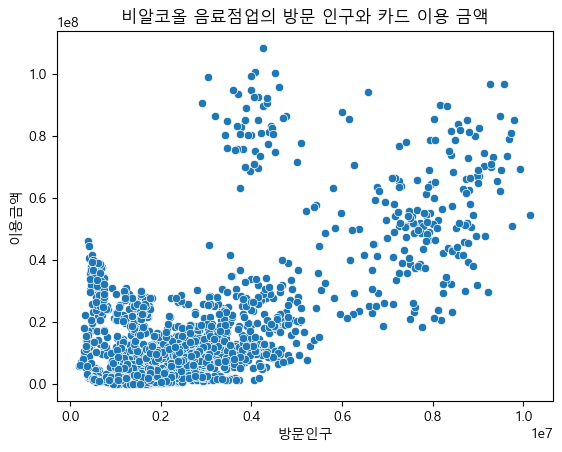

In [52]:
plt.rc('font', family='Malgun Gothic')
sns.scatterplot(cafe_df, x='방문인구', y='이용금액')
plt.title('비알코올 음료점업의 방문 인구와 카드 이용 금액')
plt.show()

In [53]:
cafe_df.corr(numeric_only=True)

,이용자수,이용금액,방문인구
이용자수,1.000,0.984,0.599
이용금액,0.984,1.000,0.633
방문인구,0.599,0.633,1.000


In [54]:
cafe_df.corr(numeric_only=True).loc['방문인구', '이용금액']

0.6332789532564609

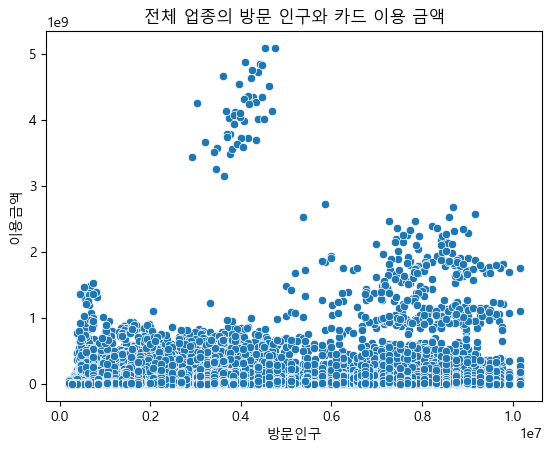

In [55]:
sns.scatterplot(jeju_df, x='방문인구', y='이용금액')
plt.title('전체 업종의 방문 인구와 카드 이용 금액')
plt.show()

In [56]:
jeju_df.corr(numeric_only=True)

,이용자수,이용금액,방문인구
이용자수,1.000,0.712,0.202
이용금액,0.712,1.000,0.163
방문인구,0.202,0.163,1.000


In [57]:
jeju_df.corr(numeric_only=True).loc['방문인구', '이용금액']  # 카페보다 상관관계가 낮다.

0.16339691358077127